# CNN model For fashion Mnist Dataset Classication

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tensorflow import keras


In [15]:
# Load Fashion MNIST data
fas_data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fas_data.load_data()

# Class names
class_names = ['Tshirt/TOP', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Data preprocessing: scaling images to [0-1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to one-hot encoding
train_labels_categorical = keras.utils.to_categorical(train_labels, 10)
test_labels_categorical = keras.utils.to_categorical(test_labels, 10)

# Reshape input data to include the channel dimension
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)


In [16]:
# Data augmentation
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
])

augmented_train_images = data_augmentation(train_images)


In [17]:
# CNN model definition
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])


In [18]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
# Set up early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = cnn_model.fit(augmented_train_images, train_labels_categorical, 
                        epochs=20, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.4669 - loss: 1.4464 - val_accuracy: 0.6971 - val_loss: 0.8002
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.6774 - loss: 0.8656 - val_accuracy: 0.7219 - val_loss: 0.7282
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7173 - loss: 0.7571 - val_accuracy: 0.7511 - val_loss: 0.6566
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7434 - loss: 0.6849 - val_accuracy: 0.7733 - val_loss: 0.6065
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7639 - loss: 0.6355 - val_accuracy: 0.7723 - val_loss: 0.6090
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7866 - loss: 0.5767 - val_accuracy: 0.7808 - val_loss: 0.5854
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8004 - loss: 0.5372 - val_accuracy: 0.7926 - val_loss: 0.5711
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8117 -

In [20]:
# Evaluate the model on test data
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels_categorical)
print(f"Test accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8237 - loss: 0.6199
Test accuracy: 0.82


In [21]:
# Save the model in .h5 format
cnn_model.save('cnn_model.h5')


In [22]:
# Save training history using pickle
with open('cnn_train_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)


In [23]:
cnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 724,640 (2.76 MB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 483,094 (1.84 MB)

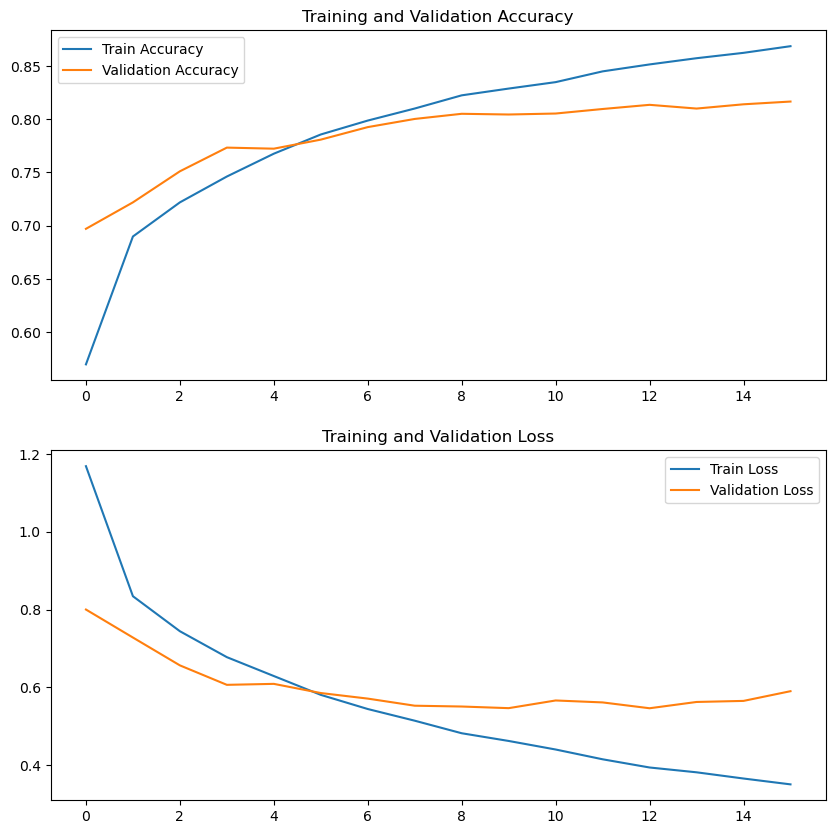

In [24]:
# Function to plot the training history
def plot_history(history):
    plt.figure(figsize=(10, 10))
    # Accuracy
    plt.subplot(2, 1, 1)
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss
    plt.subplot(2, 1, 2)
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Plot training history
plot_history(history.history)
